<span style="color:blue; font-size:30px; "> Task  2 - To Explore  UnSupervised Machine Learning </span>

# Problem Statment : 
<span style="color:red; font-size:20px; ">From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.  <span>

Kmeans - is a unsupervised machine learning algorithm which helps to make cluster of same pattern
         from the given data .  
         
         Applications :
         1 . Customer Segmentaion .
         2 . Market Analysis .
         Many More !!!!

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [44]:
data = pd.read_csv('iris.csv')
data.columns   = [i.lower() for i in data.columns]
print("Number of rows : ",data.shape[0])
print("Number of cols : ",data.shape[1])

Number of rows :  150
Number of cols :  6


In [6]:
# First 5 rows
data.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
# Check for missing values in columns 
print("No missing values !!!! ")
data.isnull().sum()

No missing values !!!! 


id               0
sepallengthcm    0
sepalwidthcm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64

In [46]:
# we'll drop id column from the dataset has it is of no use . 
data.drop(['id'],axis = 1 , inplace = True )
data.columns

Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

In [54]:
x = np.array(data.iloc[:,0:-1])

### Let's choose an optimal k-value  using Elbow Method .

In [55]:
from sklearn.cluster import KMeans
wcss = [] # goal is to choose centroids  that minimise  within cluster sum of squares .

In [56]:
for i in range(1,15):
    kmeans = KMeans(n_clusters  = i ,init='k-means++',max_iter  = 500 ,random_state = 33 )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)   

In [57]:
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 39.27787900008488,
 34.63351788897377,
 30.076048542249346,
 28.10977210532198,
 26.667280519480517,
 24.70694971453667,
 23.022952380952383,
 21.697299603174606,
 20.244659565580623]

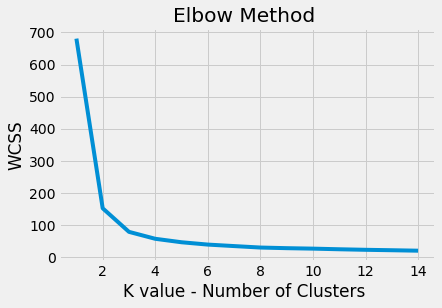

In [58]:
plt.plot(range(1,15),wcss)
plt.xlabel("K value - Number of Clusters ") 
plt.ylabel("WCSS") # within cluster sum of squares .
plt.title("Elbow Method ")
plt.show()

as you can see clearly in the above graph it shows that k is optimal when it's value is equal to 3 and simply means that wcss is not significantly decreasing much after 500 iterations ,so we are good to go by using k = 3 ,
note : goal is to choose centroids  that  minimise  within cluster sum of squares .

# Model Building 

In [59]:
# using k = 3
kmeans = KMeans(n_clusters  = 3,init='k-means++',max_iter  = 500 ,random_state = 33 )
y = kmeans.fit_predict(x)

In [60]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [89]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Let's Plot The Clusters 

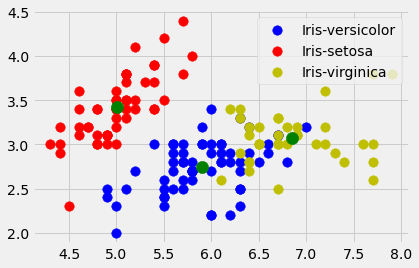

In [101]:
# plot clusters .
plt.scatter(x[y == 0 ,0],x[y==0,1],s = 90  , c = 'b', label = "Iris-versicolor")
plt.scatter(x[y == 1 ,0],x[y==1,1],s = 90  , c = 'r', label = "Iris-setosa")
plt.scatter(x[y == 2 ,0],x[y==2,1],s = 90  , c = 'y', label = "Iris-virginica")

# plot centroids location . 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 150 , c = 'g')
plt.legend()
plt.show()

# So the Optimum cluster is 3 

<span style="color:red; font-size:30px; ">  Thank You ! , 
     </span>

### Author ,Vinod R